In [1]:
# Rain Prediction in Australia Using Classification Algorithms

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



In [2]:
# Surpressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## **Import the required libraries**


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [4]:
df = pd.read_csv('Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [6]:

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'])

# Select relevant columns for correlation
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Calculate the correlation matrix
correlation_matrix = df_encoded[selected_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine   
MinTemp        1.000000  0.771005  0.013995     0.569316 -0.063475  \
MaxTemp        0.771005  1.000000 -0.139306     0.510334  0.327422   
Rainfall       0.013995 -0.139306  1.000000    -0.110343 -0.308962   
Evaporation    0.569316  0.510334 -0.110343     1.000000  0.175932   
Sunshine      -0.063475  0.327422 -0.308962     0.175932  1.000000   
WindGustSpeed  0.127792  0.073184  0.149811     0.245426 -0.029032   
WindSpeed9am  -0.298040 -0.349382  0.153696    -0.077532 -0.058410   
WindSpeed3pm   0.225905  0.155542  0.039415     0.292469  0.177813   
Humidity9am    0.053946 -0.185382  0.332636    -0.395651 -0.490631   
Humidity3pm    0.273269 -0.150741  0.305635    -0.102295 -0.586476   
Pressure9am   -0.391654 -0.385853 -0.037561    -0.343581 -0.047789   
Pressure3pm   -0.353334 -0.420375  0.001780    -0.298303 -0.094507   
Cloud9am       0.241248 -0.084695  0.245231    -0.037051 -0.665014   
Cloud3pm       0.164

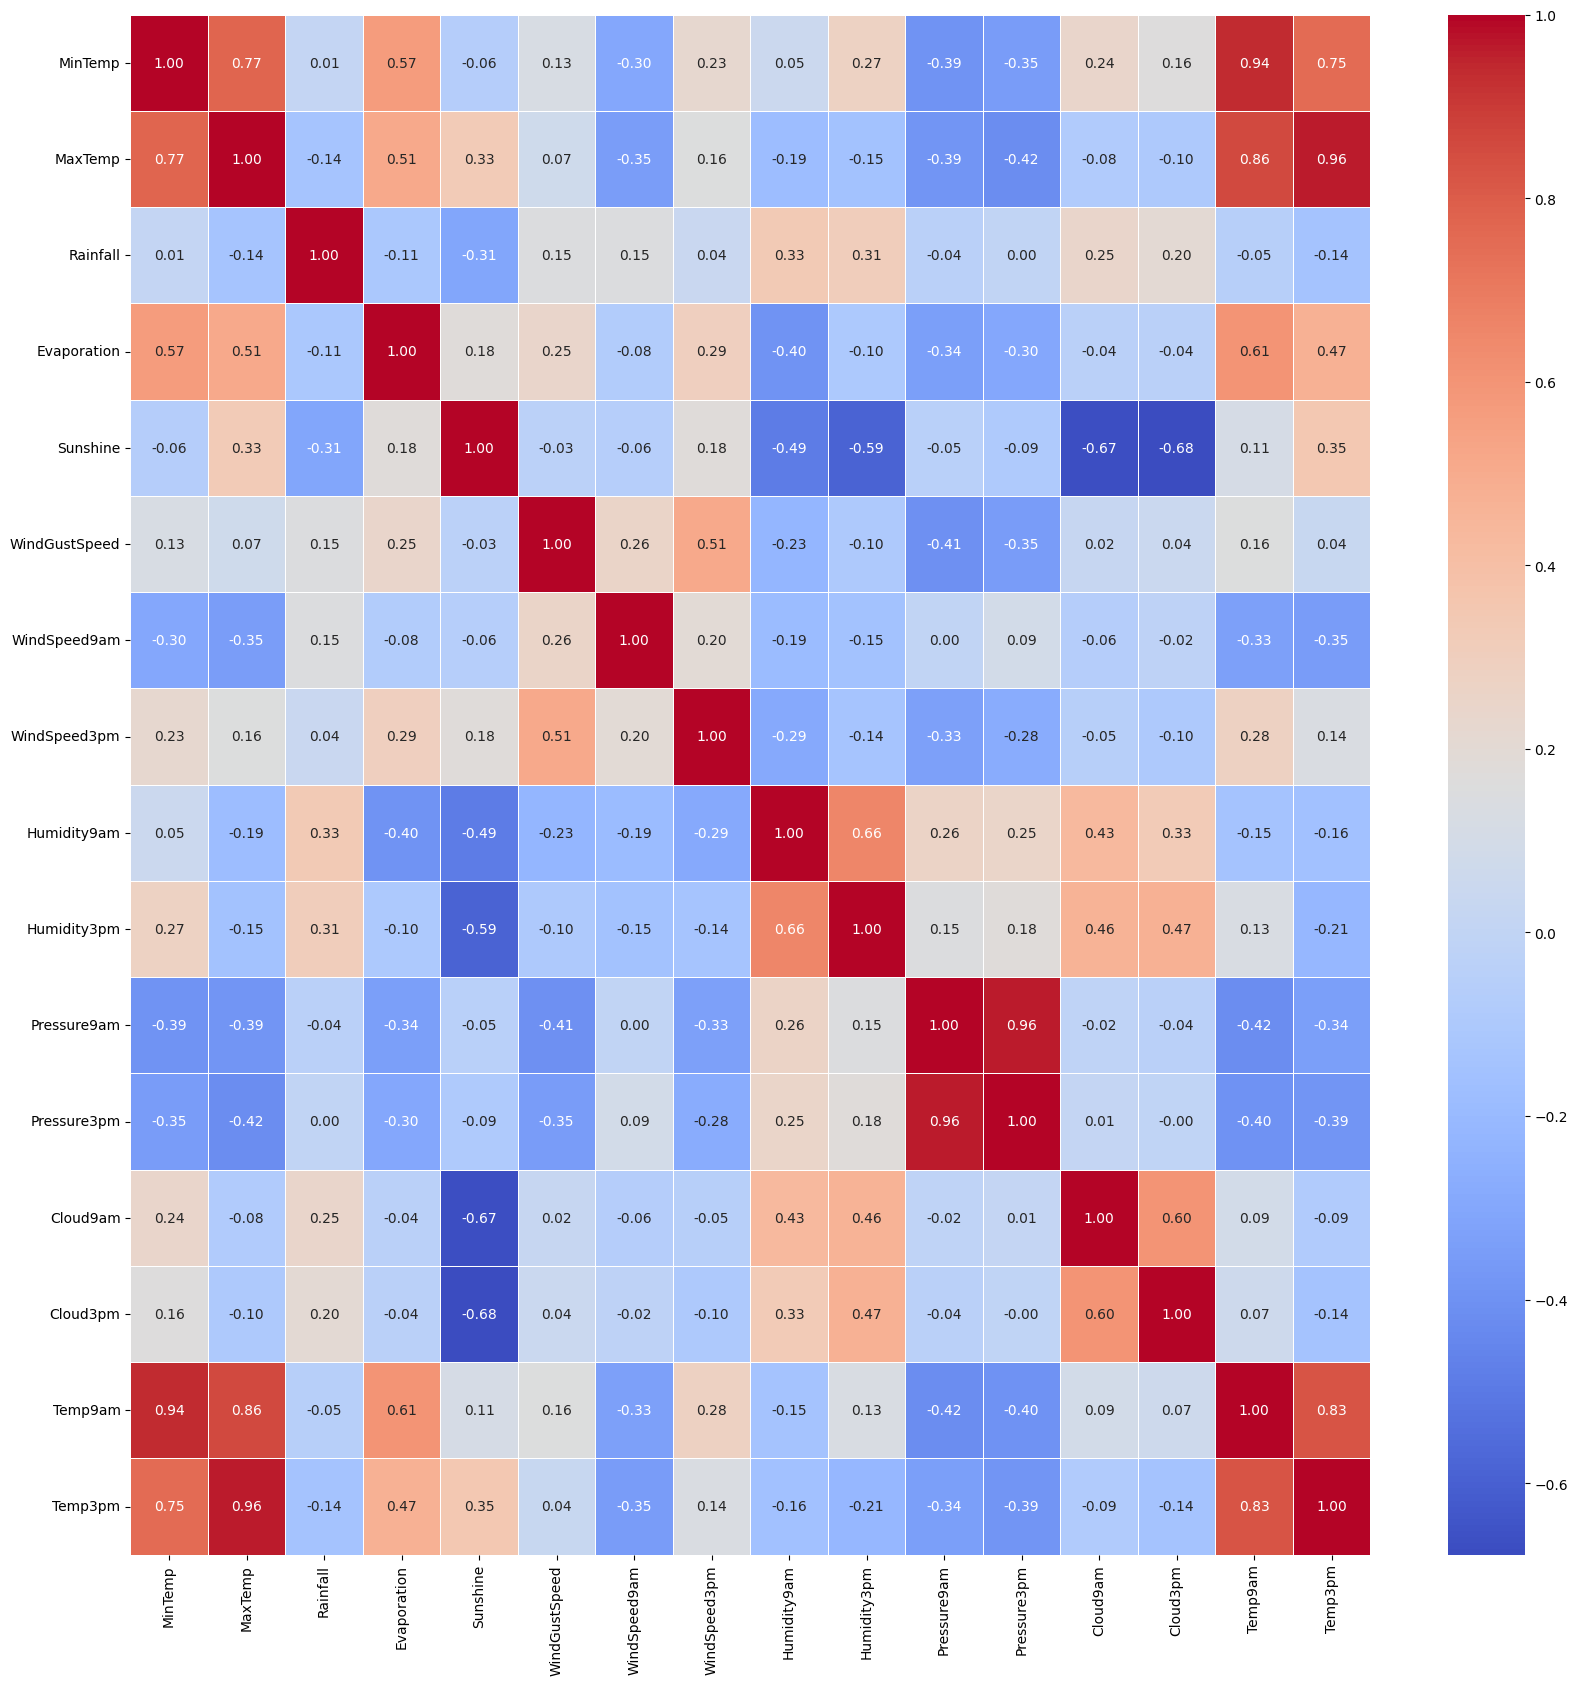

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Encode categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'])

# Select relevant columns for correlation
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Calculate the correlation matrix
correlation_matrix = df_encoded[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


In [8]:
df.dtypes

Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed             int64
WindDir9am               object
WindDir3pm               object
WindSpeed9am              int64
WindSpeed3pm              int64
Humidity9am               int64
Humidity3pm               int64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                  int64
Cloud3pm                  int64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [9]:
df_proc = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2008-02-05,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,2017-06-21,8.6,19.6,0.0,2.0,7.8,37,22,20,73,...,False,False,False,False,True,False,False,False,False,False
3267,2017-06-22,9.3,19.2,0.0,2.0,9.2,30,20,7,78,...,False,False,False,False,False,False,False,False,False,False
3268,2017-06-23,9.4,17.7,0.0,2.4,2.7,24,15,13,85,...,False,False,False,False,False,False,False,False,False,False
3269,2017-06-24,10.1,19.3,0.0,1.4,9.3,43,17,19,56,...,False,False,False,False,False,False,False,True,False,False


In [10]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainTomorrow']]

,Date,RainTomorrow
0,2008-02-01,1
1,2008-02-02,1
2,2008-02-03,1
3,2008-02-04,1
4,2008-02-05,1
...,...,...
3266,2017-06-21,0
3267,2017-06-22,0
3268,2017-06-23,0
3269,2017-06-24,0


In [11]:
df_proc.drop('Date',axis=1,inplace=True)

In [12]:
df_proc = df_proc.astype(float)

In [13]:
features = df_proc.drop(columns='RainTomorrow', axis=1)
Y = df_proc['RainTomorrow']

In [14]:
#Q1
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [15]:
#Q2
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [16]:
predictions = LinearReg.predict(x_test)


In [17]:
LinearRegression_MAE = metrics.mean_absolute_error(predictions, y_test)
LinearRegression_MSE = metrics.mean_squared_error(predictions, y_test)
LinearRegression_R2 = metrics.r2_score(predictions, y_test)
print('Linear Regression MAE: ', LinearRegression_MAE)
print('Linear Regression MSE: ', LinearRegression_MSE)
print('Linear Regression R2: ', LinearRegression_R2)

Linear Regression MAE:  0.25631456447921636
Linear Regression MSE:  0.11572037591405199
Linear Regression R2:  -0.38465202351770555


In [18]:
Report = {'MSE': [LinearRegression_MSE], 'MAE': [LinearRegression_MAE], 'R2': [LinearRegression_R2]}
Report=pd.DataFrame(Report)
Report.index = ['Linear Regression']
Report

,MSE,MAE,R2
Linear Regression,0.11572,0.256315,-0.384652


In [19]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
import numpy as np

x_test = np.ascontiguousarray(x_test)
predictions = KNN.predict(x_test)


In [21]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print('KNN Accuracy Score: ', KNN_Accuracy_Score)
print('KNN Jaccard Index: ', KNN_JaccardIndex)
print('KNN F1 Score: ', KNN_F1_Score)

KNN Accuracy Score:  0.8183206106870229
KNN Jaccard Index:  0.7901234567901234
KNN F1 Score:  0.802374933635524


In [22]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [23]:
predictions = Tree.predict(x_test)

In [24]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
Tree_F1_Score = f1_score(y_test, predictions)
print('Tree Accuracy Score: ', Tree_Accuracy_Score)
print('Tree Jaccard Index: ', Tree_JaccardIndex)
print('Tree F1 Score: ', Tree_F1_Score)

Tree Accuracy Score:  0.7923664122137405
Tree Jaccard Index:  0.7562724014336918
Tree F1 Score:  0.5878787878787879


In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [26]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [27]:
predictions = LR.predict(x_test)


In [28]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))
print('LR Accuracy Score: ', LR_Accuracy_Score)
print('LR Jaccard Index: ', LR_JaccardIndex)
print('LR F1 Score: ', LR_F1_Score)
print('LR Log Loss: ', LR_Log_Loss)

LR Accuracy Score:  0.8381679389312977
LR Jaccard Index:  0.8051470588235294
LR F1 Score:  0.6768292682926829
LR Log Loss:  0.3809483075436843


In [29]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [30]:
predictions = SVM.predict(x_test)


In [31]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions)
print('SVM Accuracy Score: ', SVM_Accuracy_Score)
print('SVM Jaccard Index: ', SVM_JaccardIndex)
print('SVM F1 Score: ', SVM_F1_Score)

SVM Accuracy Score:  0.8381679389312977
SVM Jaccard Index:  0.8047882136279927
SVM F1 Score:  0.6787878787878788


In [32]:
Report = {'Classification Algorithm': ['KNN, K=4', 'Decision Tree',  'LogisticRegression','SVM'],
          'Accuracy Score': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
          'Jaccard Score': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex,],
          'F1-score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score], 
          'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,Jaccard Score,F1-score,LogLoss
0,"KNN, K=4",0.818321,0.790123,0.802375,N/A
1,Decision Tree,0.792366,0.756272,0.587879,N/A
2,LogisticRegression,0.838168,0.805147,0.676829,0.380948
3,SVM,0.838168,0.804788,0.678788,N/A


In [33]:
import plotly.express as px

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Jaccard Score'], name='Jaccard Score'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['LogLoss'], name='LogLoss'), row=1,col=1
)

fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()
